## EDA Tiller System

### Import of libraries and data

a) Add the `pandas_profiling` library to your environment and import the following libraries:

In [1]:
from collections import Counter
import json

import pandas as pd
from pandas_profiling import ProfileReport
#ydata_profiling has also be installed => 

C:\Users\p.nguyen\AppData\Local\Temp\ipykernel_32260\143537657.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


b) Normally you have already downloaded the data [order_data](https://drive.google.com/file/d/1X5uXVFrl7SuMUKe7CJaiCmGEOhokorh2/view?usp=sharing) and [order_line](https: //drive.google.com/file/d/1G7Jbq_m-tJrHRhL-44j8XFOVs_zPil_9/view?usp=sharing).

c) Import this data into 2 dataframes order_data and order_line

In [3]:
#Let's try :-)
df_order_data = pd.read_csv("./Tiller_order_data.csv",low_memory=False)


In [4]:
#Let's try :-)
df_order_line = pd.read_csv("./Tiller_order_line.csv")

### Missing values

d) Using the info function, look at the number of missing values ​​per column of your order_data dataframe

In [12]:
df_order_data.info?

In [11]:
df_order_data.info()
#RangeIndex: 117304 entries
# """
#   #   Column          Non-Null Count   Dtype  
# ---  ------          --------------   -----  
#  0   id_order        117304 non-null  int64    => ok
#  1   id_store        117304 non-null  int64    => ok  
#  2   id_table        21917 non-null   float64  => nok
#  3   id_waiter       57377 non-null   float64  => nok
#  4   id_customer     1867 non-null    float64  => nok
#  5   id_external     117232 non-null  object   => nok
#  6   id_device       108906 non-null  float64  => nok
#  7   date_opened     117304 non-null  object   => ok 
#  8   date_closed     117304 non-null  object   => ok 
#  9   dim_name        56553 non-null   object   => nok
#  10  dim_status      117304 non-null  object   => ok 
#  11  dim_type        117304 non-null  int64    => ok 
#  12  dim_comment     94 non-null      object   => nok
#  13  dim_source      117303 non-null  object   => nok
#  14  m_nb_customer   117304 non-null  int64    => ok 
#  15  m_cached_payed  117304 non-null  float64  => ok 
#  16  m_cached_price  117304 non-null  float64  => ok 
 
#  """

e) Using this time the isnull() function, calculate the percentage of null rows per column of your datafrale order_data

In [6]:
#Let's try :-)
total = df_order_data.id_order.size
print(total)
(df_order_data.isnull().sum()/total ) *100

117304


id_order           0.000000
id_store           0.000000
id_table          81.316068
id_waiter         51.086919
id_customer       98.408409
id_external        0.061379
id_device          7.159176
date_opened        0.000000
date_closed        0.000000
dim_name          51.789368
dim_status         0.000000
dim_type           0.000000
dim_comment       99.919866
dim_source         0.000852
m_nb_customer      0.000000
m_cached_payed     0.000000
m_cached_price     0.000000
dtype: float64

In [6]:
for i in range(0,16):
    size = df_order_data.iloc[:,i].size
    size_is_null = df_order_data.iloc[:,i].isnull().sum()
    column_name = df_order_data.columns[i]
    #output console
    print(f"percentage of null rows for '{column_name}': {(size_is_null/size)*100 : .2f}%")
    

percentage of null rows for 'id_order':  0.00%
percentage of null rows for 'id_store':  0.00%
percentage of null rows for 'id_table':  81.32%
percentage of null rows for 'id_waiter':  51.09%
percentage of null rows for 'id_customer':  98.41%
percentage of null rows for 'id_external':  0.06%
percentage of null rows for 'id_device':  7.16%
percentage of null rows for 'date_opened':  0.00%
percentage of null rows for 'date_closed':  0.00%
percentage of null rows for 'dim_name':  51.79%
percentage of null rows for 'dim_status':  0.00%
percentage of null rows for 'dim_type':  0.00%
percentage of null rows for 'dim_comment':  99.92%
percentage of null rows for 'dim_source':  0.00%
percentage of null rows for 'm_nb_customer':  0.00%
percentage of null rows for 'm_cached_payed':  0.00%


f) How can you explain that there are so many id_customer to null?

In [ ]:
# customers are not registered

g) Create a subdataframe that only contains non-null id_customer rows? You can use the `~` operator

In [21]:
#Let's try :-)
mask = df_order_data.id_customer.isnull() 
#print(mask)
# question: why it is working with and without .loc ?
df_sub_nonnull_id_customer = df_order_data.loc[~mask]
#df_sub_nonnull_id_customer = df_order_data[~mask]

df_sub_nonnull_id_customer

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
173,133891746,8283,NaN,16793.0,1673951.0,C4F34FB9-6DA1-45A1-95B6-107896E528CA,NaN,2020-07-21 10:36:18 UTC,2020-07-21 10:48:32 UTC,A6,CLOSED,1,NaN,tiller-order,1,30.9,30.9
174,135443933,8283,NaN,16793.0,2274880.0,FB13A7D7-EF75-4F89-8FE0-A65D98848F20,NaN,2020-07-30 16:17:39 UTC,2020-07-30 16:18:23 UTC,A9,CLOSED,1,NaN,tiller-order,1,32.7,32.7
179,132658768,8283,NaN,16793.0,1739179.0,67F9BCE7-E36D-4694-8238-08119AE1B766,NaN,2020-07-13 13:16:48 UTC,2020-07-13 13:17:11 UTC,A11,CLOSED,1,NaN,tiller-order,1,19.9,19.9
183,56148970,4337,NaN,NaN,1240617.0,2098522,NaN,2019-01-17 17:39:43 UTC,2019-01-17 17:49:01 UTC,MD 2098522 (18:41),CLOSED,1,Delivery,RestoIn,0,23.8,23.8
190,114066972,8283,NaN,16793.0,1887406.0,B166821F-F0B5-46C8-9354-ADCEBB9C56D1,NaN,2020-01-21 15:50:41 UTC,2020-01-21 15:51:38 UTC,A22,CLOSED,1,NaN,tiller-order,1,31.7,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91151,136528858,9084,265242.0,18911.0,2573388.0,E665CB9C-219E-4846-800D-6CAE6BDD41E2,17320.0,2020-08-06 19:00:17 UTC,2020-08-06 23:57:37 UTC,B11,CLOSED,1,NaN,tiller-order,1,7.0,7.0
91629,136657765,8052,184593.0,16199.0,2588048.0,11DBED68-B617-4C9D-8BCB-61CBA926CCBB,16813.0,2020-08-07 16:42:32 UTC,2020-08-07 19:52:21 UTC,B2,CLOSED,1,NaN,tiller-order,4,83.4,83.4
92264,135621408,8052,184589.0,NaN,2577253.0,A36EDBF9-18DD-44ED-9D7D-5BE671B42441,16813.0,2020-07-31 16:42:53 UTC,2020-07-31 18:54:04 UTC,Benjamin GUILLEMOIS,CLOSED,1,NaN,Tiller iPAD,5,46.0,46.0
93555,135621383,8052,184594.0,NaN,2577910.0,9F7A93B7-ABA6-4F65-98C0-8D9993E14858,16813.0,2020-07-31 17:52:16 UTC,2020-07-31 22:37:23 UTC,Benjamin,CLOSED,3,NaN,Tiller iPAD,4,136.5,136.5


### Descriptive statistics

h) What is the average price of an order? median? minimum? max?

In [33]:
#Let's try :-)
average = df_order_data["m_cached_payed"].mean()
median = df_order_data["m_cached_payed"].median()
minimum = df_order_data["m_cached_payed"].min()
maximum = df_order_data["m_cached_payed"].max()


print(f"the average price of an order is {average : .2f} Euro")
print(f"the median price of an order is {median: .2f} Euro") 
print(f"the minimum price of an order is {minimum: .2f} Euro") 
print(f"the maximum price of an order is {maximum: .2f} Euro") 

the average price of an order is  38.29 Euro
the median price of an order is  14.10 Euro
the minimum price of an order is  0.00 Euro
the maximum price of an order is  11512.50 Euro


i) Use the describe function to have more descriptive statistics

In [14]:
#Let's try :-)
df_order_data.describe()

The dim_comment column

j) What is the mode of the dim_name column?

In [61]:
#parameter of mode to ignore NaN/NaT
df_order_data.dim_name.mode?

In [63]:
#Let's try :-)
df_order_data.dim_name.mode(False)

0    NaN
Name: dim_name, dtype: object

k) [More difficult] In which store was the order placed with the most products ordered? How many products in total?

In [97]:
#Let's try :-)
# us m_quantity =>
df_total_order = df_order_data.groupby("id_store").size().reset_index(name='total_orders')

index = df_total_order.total_orders.idxmax()

store = df_total_order.id_store.loc[index]

print(f"{store} with most products ordered with {df_total_order.total_orders.max()}")

1796 with most products ordered with 27349


In [83]:
df_order_data.groupby('id_store')['id_order'].count().nlargest()

id_store
1796    27349
4337    20003
4542    17641
6293    16103
8283    10023
Name: id_order, dtype: int64

### Temporal analyzes

l) Convert `date_opened` and `date_closed` columns to datetime format

In [37]:
df_order_data.date_opened

0         2019-01-12 13:02:17 UTC
1         2019-01-16 19:39:09 UTC
2         2019-01-12 14:18:46 UTC
3         2019-01-24 17:49:12 UTC
4         2019-01-12 15:25:06 UTC
                   ...           
117299    2019-02-28 13:13:21 UTC
117300    2019-06-11 11:08:01 UTC
117301    2019-06-17 10:30:50 UTC
117302    2019-02-21 11:50:58 UTC
117303    2019-09-18 11:32:35 UTC
Name: date_opened, Length: 117304, dtype: object

In [38]:
df_order_data.date_closed

0         2019-01-12 19:58:38 UTC
1         2019-01-16 22:10:50 UTC
2         2019-01-12 19:50:32 UTC
3         2019-01-24 21:58:59 UTC
4         2019-01-12 19:21:03 UTC
                   ...           
117299    2019-02-28 13:38:45 UTC
117300    2019-06-11 11:10:26 UTC
117301    2019-06-17 10:32:45 UTC
117302    2019-02-21 11:51:56 UTC
117303    2019-09-18 11:39:38 UTC
Name: date_closed, Length: 117304, dtype: object

In [23]:
#Let's try :-)
df_order_data.date_opened= pd.to_datetime(df_order_data.date_opened)
df_order_data.date_closed= pd.to_datetime(df_order_data.date_closed)

In [41]:
df_order_data.date_opened

0        2019-01-12 13:02:17+00:00
1        2019-01-16 19:39:09+00:00
2        2019-01-12 14:18:46+00:00
3        2019-01-24 17:49:12+00:00
4        2019-01-12 15:25:06+00:00
                    ...           
117299   2019-02-28 13:13:21+00:00
117300   2019-06-11 11:08:01+00:00
117301   2019-06-17 10:30:50+00:00
117302   2019-02-21 11:50:58+00:00
117303   2019-09-18 11:32:35+00:00
Name: date_opened, Length: 117304, dtype: datetime64[ns, UTC]

m) Using the set_index function, index the date_opened column to the dataframe (already in datetime format)

In [64]:
#Let's try :-)
#, implace is changing the root original df
df_setIndexDateOpened = df_order_data.set_index('date_opened')
df_setIndexDateOpened.head(5)

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
2019-01-16 19:39:09+00:00,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2019-01-12 14:18:46+00:00,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
2019-01-24 17:49:12+00:00,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
2019-01-12 15:25:06+00:00,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9


n) From here all date features are available to you!!

Using the resample function calculate the amount received from all restaurants per week.

In [62]:
df_setIndexDateOpened.resample?

//Google search:
B business day frequency
C custom business day frequency (experimental)
D calendar day frequency
W weekly frequency
M month end frequency
SM semi-month end frequency (15th and end of month)
BM business month end frequency
CBM custom business month end frequency
MS month start frequency
SMS semi-month start frequency (1st and 15th)
BMS business month start frequency
CBMS custom business month start frequency
Q quarter end frequency
BQ business quarter endfrequency
QS quarter start frequency

<AxesSubplot: xlabel='date_opened'>

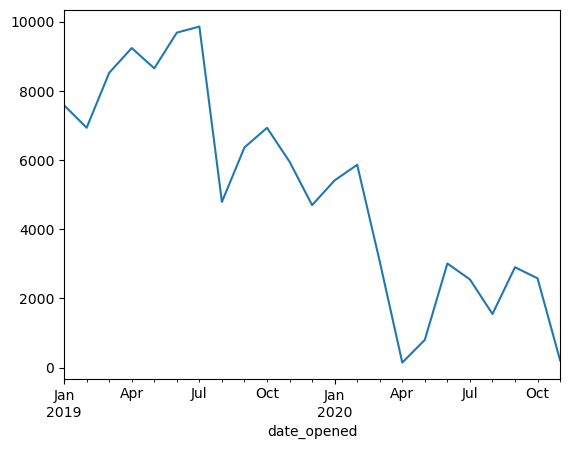

In [112]:
#Let's try :-)
df_setIndexDateOpened.resample('M').size().plot()

o) We rather want to have it per week and per restaurant, modify the previous code.

Note: resample comes after the groupby...

In [53]:
#Let's try :-)
df_setIndexDateOpened.groupby(['id_store']).resample('M').size()

id_store  date_opened              
360       2019-01-31 00:00:00+00:00    205
          2019-02-28 00:00:00+00:00    269
          2019-03-31 00:00:00+00:00    295
          2019-04-30 00:00:00+00:00    200
          2019-05-31 00:00:00+00:00    245
                                      ... 
9084      2020-07-31 00:00:00+00:00    598
          2020-08-31 00:00:00+00:00    529
          2020-09-30 00:00:00+00:00    544
          2020-10-31 00:00:00+00:00    583
          2020-11-30 00:00:00+00:00     63
Length: 179, dtype: int64

p) Finally we want it by quarter, modify the previous code to obtain the result. You can store the result in a quarter_results dataframe.

You can check [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) to see all possible options of resample function.

Practical, no?

In [60]:
#Let's try :-)
df_quarter_results = df_setIndexDateOpened.groupby(['id_store']).resample('Q').size()
df_quarter_results

id_store  date_opened              
360       2019-03-31 00:00:00+00:00     769
          2019-06-30 00:00:00+00:00     679
          2019-09-30 00:00:00+00:00     725
          2019-12-31 00:00:00+00:00     894
          2020-03-31 00:00:00+00:00     696
                                       ... 
9084      2019-12-31 00:00:00+00:00    1222
          2020-03-31 00:00:00+00:00    1278
          2020-06-30 00:00:00+00:00     824
          2020-09-30 00:00:00+00:00    1671
          2020-12-31 00:00:00+00:00     646
Length: 65, dtype: int64

q) Study the function [pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) of pandas and calculate the evolution of CA per restaurant per quarter in a new column.

In [63]:
# Computes the percentage change from the immediately previous row by
# default. This is useful in comparing the percentage of change in a time
# series of elements.
df_setIndexDateOpened.pct_change?

In [62]:
#Let's try :-)
df_setIndexDateOpened.groupby(['id_store']).resample('Q').size().pct_change()

id_store  date_opened              
360       2019-03-31 00:00:00+00:00         NaN
          2019-06-30 00:00:00+00:00   -0.117035
          2019-09-30 00:00:00+00:00    0.067747
          2019-12-31 00:00:00+00:00    0.233103
          2020-03-31 00:00:00+00:00   -0.221477
                                         ...   
9084      2019-12-31 00:00:00+00:00    0.054357
          2020-03-31 00:00:00+00:00    0.045827
          2020-06-30 00:00:00+00:00   -0.355243
          2020-09-30 00:00:00+00:00    1.027913
          2020-12-31 00:00:00+00:00   -0.613405
Length: 65, dtype: float64

r) What is the restaurant with the most important evolution per quarter on this data? For which quarter?

In [72]:
#Let's try :-)
df_setIndexDateOpened.groupby(['id_store']).resample('Q').size().pct_change().idxmax()

(9084, Timestamp('2019-06-30 00:00:00+0000', tz='UTC'))

### PivotTables

s) On the order data, look at all the modalities of dim_source by occurrence

In [75]:
# The mode is the value that appears most often. There can be multiple modes.
# Always returns Series even if only one value is returned.

df_order_data.dim_source.mode?

In [30]:
df_order_data.dim_source

0          Tiller iPAD
1          Tiller iPAD
2          Tiller iPAD
3         tiller-order
4          Tiller iPAD
              ...     
117299     Tiller iPAD
117300     Tiller iPAD
117301     Tiller iPAD
117302     Tiller iPAD
117303     Tiller iPAD
Name: dim_source, Length: 117304, dtype: object

In [31]:
#Let's try :-)
df_order_data.dim_source.mode()

0    Tiller iPAD
Name: dim_source, dtype: object

In [32]:
# check what for unique values are out there 
df_order_data.dim_source.unique()

array(['Tiller iPAD', 'tiller-order', 'other', 'LAFOURCHETTE'],
      dtype=object)

t) Replace values ​​other than "Tiller iPAD", "tiller-order" and "LAFOURCHETTE" with "Other". Use the loc function with a mask using the .isin function.

In [33]:
#Let's try :-)
mask = ~df_order_data.dim_source.isin(['Tiller iPAD', 'tiller-order', 'LAFOURCHETTE'])
#print(mask)
df_order_data.loc[mask, 'dim_source'] = 'other'
df_order_data.loc[mask, 'dim_source']

183     other
346     other
347     other
447     other
487     other
        ...  
8385    other
8423    other
8493    other
8563    other
8568    other
Name: dim_source, Length: 166, dtype: object

u) Using the pivot_table function, calculate the turnover generated by restaurant in rows and by dim_source in column. You can use the fillna function to replace null values ​​with 0.

We will also use a reset_index to reassemble the id_store as columns

In [122]:
# Question : What's the difference between pivot and pivot_table 
df_order_data.pivot_table?



In [ ]:
df_order_data.fillna?

In [34]:
#Let's try :-)
df_pivot_table = df_order_data.pivot_table(index='id_store',columns= 'dim_source', values='m_cached_payed', aggfunc='sum').fillna(0)
df_pivot_table

dim_source,LAFOURCHETTE,Tiller iPAD,other,tiller-order
id_store,,,,
360,111.4,339334.64,0.00,47643.10
1796,0.0,32402.74,0.00,288696.95
4337,0.0,861920.50,3437.39,0.00
4542,0.0,115965.84,0.00,127762.85
6293,0.0,359347.00,0.00,124.00
7965,0.0,1044520.95,0.00,94170.00
8052,0.0,294655.29,0.00,33103.56
8283,0.0,0.00,0.00,369822.82
8347,0.0,23.00,0.00,0.00


In [35]:
#Let's try :-)
df_turnover = df_order_data.groupby(['id_store','dim_source'])['m_cached_payed'].sum().reset_index(name='turnover')
df_turnover


,id_store,dim_source,turnover
0,360,LAFOURCHETTE,111.40
1,360,Tiller iPAD,339334.64
2,360,tiller-order,47643.10
3,1796,Tiller iPAD,32402.74
4,1796,tiller-order,288696.95
5,4337,Tiller iPAD,861920.50
6,4337,other,3437.39
7,4542,Tiller iPAD,115965.84
8,4542,tiller-order,127762.85
9,6293,Tiller iPAD,359347.00


v) [Bonus] Go back to the previous dataframe and bring down all the dim_source in a new column with the melt function

In [40]:
#Let's try :-)
df_pivot_table.melt()

,dim_source,value
0,LAFOURCHETTE,111.40
1,LAFOURCHETTE,0.00
2,LAFOURCHETTE,0.00
3,LAFOURCHETTE,0.00
4,LAFOURCHETTE,0.00
5,LAFOURCHETTE,0.00
6,LAFOURCHETTE,0.00
7,LAFOURCHETTE,0.00
8,LAFOURCHETTE,0.00
9,LAFOURCHETTE,0.00


## Pandas profiling

There are libraries in Python to make data exploration even easier.

`pandas-profiling` is one! Look at this article which details its possibilities.

w) Download the `pandas-profiling` library in your environment and generate an order data report order_data.

In [115]:
#Let's try :-)
profile_report = ProfileReport(df_order_data)
#profile.to_file("data_report.html")

x) From this generated file: answer the following questions:
- What is the percentage of missing values?
- How many numeric variables are there? categorical? Do these numbers seem consistent to you? Are there any points of attention to raise?
- What is the percentage of data with the value "tiller-order" in the "dim_source" column?
- What is the skewness coefficient for the m_nb_customer variable?

1. What is the percentage of missing values?

Missing cells	457182


2. How many numeric variables are there? categorical? Do these numbers seem consistent to you? Are there any points of attention to raise?
Number of variables	17

3. What is the percentage of data with the value "tiller-order" in the "dim_source" column?
53.6%

What is the skewness coefficient for the m_nb_customer variable?
Skewness	11.000394

y) Thanks to the to_json method of the report, store this json in a Python dictionary by executing the code below

In [116]:
#Let's try :-)
profile_json = json.loads(profile_report.to_json())

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

z) Determine which variable has the highest kurtosis coefficient

In [118]:
#Let's try :-)
for variable, variable_info in profile_json['variables']['id_order'].items():
    if 'kurtosis' in variable_info:
        kurtosis_dictionary(variable) =variable_info['kurtosis']

SyntaxError: cannot assign to function call (3215595651.py, line 4)

# Text Processing

a_bis) The `id_external` field follows in almost all cases the following pattern X-X-X-X-X, where X corresponds to a character string of a certain length and composed of letters as well as numbers.
Determine how many rows in this dataframe do not follow this pattern?

In [150]:
#Let's try :-)
df_order_data.id_external


0         0425716B-EFF4-41CA-AEA1-839104F36833
1         75E41FE2-64FF-41D3-954C-A7DE4AA887EF
2         F6051A05-C9AC-4033-BF72-BB5149B8F439
3         B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62
4         17F0533C-2FF1-4FC5-A50D-12704C7B7A4B
                          ...                 
117299    C4A0AFD8-FBD7-4740-A48B-4890F46E43E2
117300    95A17B0B-22AE-43A1-8BEB-B105BF337655
117301    0E5D4843-7EA3-4D9E-9490-EB9717A0220F
117302    CE760A3B-4464-462A-AA2C-CCFEB88EEC39
117303    F004A307-C7C9-4508-A587-49ED5CF8F156
Name: id_external, Length: 117304, dtype: object

In [7]:
#Let's try :-)
# Define the regular expression pattern
pattern = r'\S{8}-\S{4}-\S{4}-\S{4}-\S{12}'
mask = df_order_data.id_external.str.match(pattern).fillna(False)
df_filtered = df_order_data.loc[~mask].size
df_filtered

2822

b_bis) [Difficult] The security team informs you that there is a computer flaw in the order recording system and that some orders are corrupted.
Here are the characteristics to determine if an order is corrupt:
- The field evaluated is the `external id` field
- This field follows the pattern X-X-X-X-X, where X corresponds to a character string of a certain length
- X contains strictly more numbers than letters

Filter your dataset to only keep corrupt orders. How many do you find?

In [42]:
import re

In [46]:
def has_more_digits_than_letters(value):
    # create array of string 
    strings = value.split('-')
    # initialize return value status 
    status = False
    
    #loop through strings and check if each part met the condition digits > letters
    for string in strings:
        numberDigits = len(re.findall(r'\d', string))
        numberLetters = len(re.findall(r'\D', string))
        #print (f"for {string}---number of digits: {numberDigits}; number of letters: {numberLetters}")
        
        if numberDigits > numberLetters:
            status = True
            
        else: 
            status = False
          
    return status

has_more_digits_than_letters('04AAAA6B-EFF4-41CA-AEA1-839104F36833')


True

In [50]:
#Let's try :-)
# Define the regular expression pattern
pattern = r'\S{8}-\S{4}-\S{4}-\S{4}-\S{12}'
mask = df_order_data.id_external.str.match(pattern).fillna(False)
#check more number than letters only for entries with valid format
mask_DigitLetters = df_order_data.loc[mask].id_external.apply(has_more_digits_than_letters)

#for debug purpose only
#print(maskDigitLetters)
        
#get filtered data by combining several masks         
df_filtered = df_order_data.loc[~mask | ~mask_DigitLetters]

print (f"INFO: {df_filtered.size} corrupt order entries are found.")


INFO: 543745 corrupt order entries are found.
